Use and test functionality created in nlp2ocp_dev

In [1]:
using NLOptControl
using Parameters
using Plots
using Polynomials

In [2]:
############
# TEST DATA
############
t0 = Float64(0); tf = Float64(10);
t = Array(linspace(t0,tf,100));
α₁ =  -0.3; α₂ = 3; α₃ = -8; α₄ =  7;

γ = Poly([α₁,α₂,α₁]); #TODO check on that imported binding warning
y = polyval(γ,t);

# evaluate the integral
∫γ = polyint(γ);
Y = polyval(∫γ,t[end]) - polyval(∫γ,t[1]);
C = Y - polyval(∫γ,t[end]); # constant of integration
∫y = polyval(∫γ,t) + C;

# evaluate the derivative
dγ = polyder(γ);
dy = polyval(dγ,t);
############
# TEST DATA
############

100-element Array{Float64,1}:
  3.0    
  2.93939
  2.87879
  2.81818
  2.75758
  2.69697
  2.63636
  2.57576
  2.51515
  2.45455
  2.39394
  2.33333
  2.27273
  ⋮      
 -2.33333
 -2.39394
 -2.45455
 -2.51515
 -2.57576
 -2.63636
 -2.69697
 -2.75758
 -2.81818
 -2.87879
 -2.93939
 -3.0    

In [3]:
ps, nlp = initialize_NLP(numStates=2,numControls=2,Ni=2,Nck=[3, 3]);
@pack ps = t0, tf;  # given in problem def.

10.0

In [4]:
@unpack Nck, Ni, t0, tf, τ, ω = ps;
di, tm, ts, ωₛ = create_intervals(t0,tf,Ni,Nck,τ,ω);
@pack ps = τ, ω, ωₛ, ts;


In [5]:
generate_Fake_data(nlp,ps,γ);

In [6]:
nlp2ocp(nlp,ps);


In [7]:
ζ, approx_int_st = integrate_state(ps,nlp)

Using default Gaussian quaratureUsing default Gaussian quaratureUsing default Gaussian quaratureUsing default Gaussian quarature

In [8]:
ζ, approx_int_st = integrate_state(ps,nlp;(:mode=>:LGRIM))

Using the Legendre-Gauss-Radau integration matrix (LGRIM)Using the Legendre-Gauss-Radau integration matrix (LGRIM)Using the Legendre-Gauss-Radau integration matrix (LGRIM)Using the Legendre-Gauss-Radau integration matrix (LGRIM)

(Array{Float64,2}[
[0.0 0.0 0.0; 0.0 0.0 0.0],

[0.0 0.0 0.0; 0.0 0.0 0.0]],
[0.0; 0.0])

# Make sure that you calculate the IMatrix before you try and use it!

In [9]:
LGR_matrices(ps,nlp)

LoadError: type Tuple is immutable

In [10]:
ps

NLOptControl.PS_data
  Nck: [3,3]
  Ni: 2
  τ: Array{Float64,1}[[-1.0,-0.289898,0.689898],[-1.0,-0.289898,0.689898]]
  ts: Array{Float64,1}[[0.0,1.77526,4.22474,5.0],[5.0,6.77526,9.22474,10.0]]
  ω: Array{Float64,1}[[0.222222,1.02497,0.752806],[0.222222,1.02497,0.752806]]
  ωₛ: Array{Float64,1}[[0.555556,2.56243,1.88202],[0.555556,2.56243,1.88202]]
  t0: 0.0
  tf: 10.0
  DMatrix: Array{Float64,2}[
[-1.0 1.50639 -1.10639 0.6; -0.210639 -0.155051 0.713568 -0.347878; 0.0506395 -0.233568 -0.644949 0.827878],

[-1.0 1.50639 -1.10639 0.6; -0.210639 -0.155051 0.713568 -0.347878; 0.0506395 -0.233568 -0.644949 0.827878]]
  IMatrix: Array{Float64,2}[
[0.763299 1.10206 -0.0901063; 0.436701 2.89011 0.897938; 0.555556 2.56243 1.88202],

[0.763299 1.10206 -0.0901063; 0.436701 2.89011 0.897938; 0.555556 2.56243 1.88202]]
  stateMatrix: Array{Float64,2}[
[-0.3 0.0; 4.08031 0.0; 7.01969 0.0; 7.2 0.0],

[7.2 0.0; 6.25454 0.0; 1.84546 0.0; -0.3 0.0]]
  controlMatrix: Array{Float64,2}[
[0.0 0.0; 0.0 0.0; 

In [11]:
ζ, approx_int_st = integrate_state(ps,nlp;(:mode=>:LGRIM))

Using the Legendre-Gauss-Radau integration matrix (LGRIM)Using the Legendre-Gauss-Radau integration matrix (LGRIM)Using the Legendre-Gauss-Radau integration matrix (LGRIM)Using the Legendre-Gauss-Radau integration matrix (LGRIM)

# SAME FINAL RESULT AS OTHER ONE! --> there are differences in intermediate values though

In [13]:
dζ = differentiate_state(ps,nlp)

2-element Array{Array{Float64,2},1}:
 [3.0 1.93485 0.465153; 0.0 0.0 0.0]          
 [-2.22045e-15 -1.06515 -2.53485; 0.0 0.0 0.0]


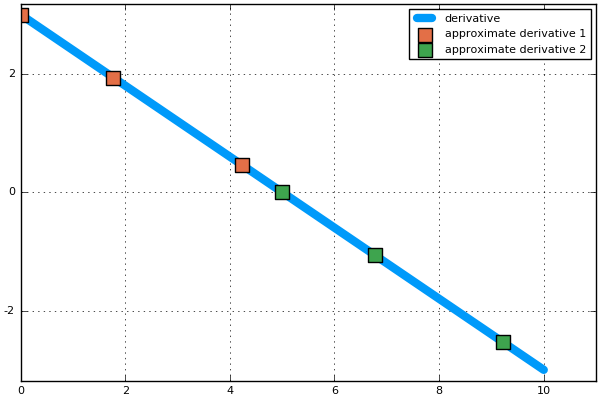

In [18]:
dp=plot(0,leg=:false)
plot!(t,dy,label="derivative",w=6)
for st in 1:1
    for int in 1:Ni
        scatter!(ts[int][1:end-1],dζ[int][st,1:Nck[int]],markersize =10,markershape = :rect,label=string("approximate derivative ",int))
    end
end
xlims!(t0,tf*1.1)

Which matches the actual!!